In [1]:
import random
random.seed(7)
from exercise_5_12 import *

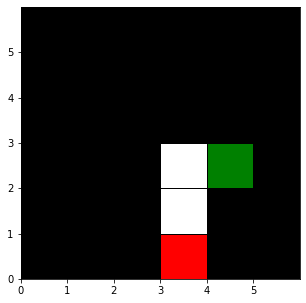

In [2]:
starting_line, finishing_line, track = get_small_map()
plot_map(starting_line, finishing_line, track, (6, 6), (5, 5))

In [3]:
policy, b, Q, C = initialize_learning_off_pol(starting_line, track)

In [4]:
states = []
actions = []
rewards = []
states, actions, rewards = generate_episode(starting_line, finishing_line, track, b, noise=0.0)
states

[(3, 0, 0, 0),
 (3, 0, 0, 0),
 (3, 1, 0, 1),
 (3, 0, 0, 0),
 (3, 1, 0, 1),
 (3, 2, 0, 1)]

In [5]:
actions

[(1, 1), (0, 1), (0, 1), (0, 1), (0, 0), (1, -1)]

In [6]:
rewards

[-1, -1, -1, -1, -1, 0]

In [14]:
policy, b, Q, C = initialize_learning_off_pol(starting_line, track)
states = [(3, 0, 0, 0), (3, 1, 0, 1), (3, 2, 0, 1)]
actions = [(0, 1), (0, 0), (1, -1)]
rewards = [-1, -1, 0]

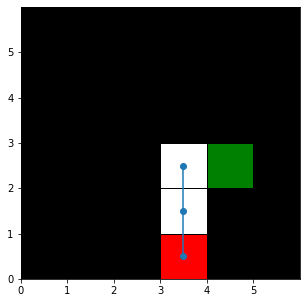

In [15]:
plot_trajectory(starting_line, finishing_line, track, (6, 6), (5, 5), states)

In [16]:
policy[(3, 2, 0, 1)]

{(0, 0): 1.0, (0, 1): 0.0, (1, -1): 0.0, (1, 0): 0.0, (1, 1): 0.0}

In [17]:
G = 0
W = 1
for t in range(len(states) - 1, -1, -1):
    print(t)
    s = states[t]
    a = actions[t]
    G = 1 * G + rewards[t]
    C[(s, a)] += W
    Q[(s, a)] += (W / C[(s, a)]) * (G - Q[(s, a)])
    
    # Argmax over a, break ties by favoring the last selected action by b,
    # then by the deterministic ordering of get_greedy_action.
    # If not "favoring the last selected action by b", and simply relying on
    # the ordering of get_greedy_action, the algorithm can easily get stuck,
    # even though get_greedy_action provides consistent ordering.
    greedy_action = get_greedy_action(Q, s)
    if Q[(s, a)] == Q[(s, greedy_action)]:
        policy[s] = get_eps_greedy_probabilities(s, a)
    else:
        policy[s] = get_eps_greedy_probabilities(s, greedy_action)

    # Break if pi(s) != a
    if list(policy[s].keys())[list(policy[s].values()).index(1)] != a:
        break
    W = W * (1 / b[s][a])

2
1
